In [1]:
from sklearn.neighbors import KNeighborsClassifier
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

# Load data
data_tr = datasets.MNIST(root="C:/Users/ondra/Python Projects/datasets/MNIST", train=True, download=True, transform=ToTensor())
data_ts = datasets.MNIST(root="C:/Users/ondra/Python Projects/datasets/MNIST", train=False, download=True, transform=ToTensor())

In [2]:
# change the tensor to array

Xtr = np.array(data_tr.data)
ytr = np.array(data_tr.targets)

Xts = np.array(data_ts.data)
yts = np.array(data_ts.targets)

In [4]:
# reshape array into rows

Xtr_rows = Xtr.reshape(60000, 28*28)
Xts_rows = Xts.reshape(10000, 28*28)

# Xtr_rows = Xtr_rows[:50000,]
# Xtr_rows_vali = Xtr_rows[-10000:,]
# print(Xtr_rows.shape)


In [3]:
def valiSplit(data, percentage):
    # splits input data into train and validation set
    treshold = round(data.shape[0] * percentage)
    trainData = data[:treshold,]
    valiData = data[-(data.shape[0] - treshold):,]
    return trainData, valiData

In [10]:
trainData, valiData = valiSplit(Xtr_rows, 0.85)
trainY, valiY = valiSplit(ytr, 0.85)

In [11]:
# Model

soused = KNeighborsClassifier(n_neighbors=3)
soused.fit(trainData, trainY)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# 3 nn model gives 97% acc on validation data

soused.score(valiData, valiY)

0.974

In [13]:
# trying more values for k

listOfk = [1, 2, 3, 5, 7, 10, 30]
scoreVali = []
scoreTest = []

for k in listOfk:
    print("Now calculating for:", k)
    soused = KNeighborsClassifier(n_neighbors=k)
    soused.fit(trainData, trainY)
    scoreVali.append(soused.score(valiData, valiY))
    scoreTest.append(soused.score(Xts_rows, yts))

Now calculating for: 1
Now calculating for: 2
Now calculating for: 3
Now calculating for: 5
Now calculating for: 7
Now calculating for: 10
Now calculating for: 30


<function matplotlib.pyplot.show(close=None, block=None)>

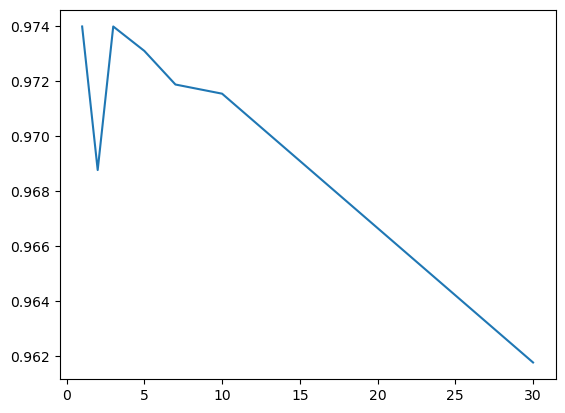

In [14]:
plt.plot(listOfk, scoreVali)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

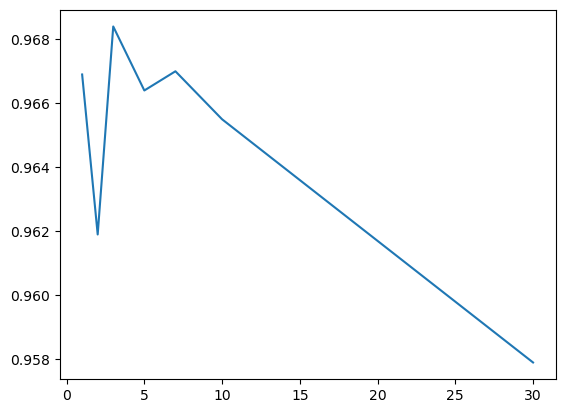

In [15]:
plt.plot(listOfk, scoreTest)
plt.show